In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt

Przygotować programy do aproksymacji średniokwadratowej (dyskretnej) wielomianami algebraicznymi.

Zadana funkcja

In [4]:
def f(x):
    return 30 + (x**2 / 1.5) - 30 * math.cos(1.5 * x)

f_range_a = -4 * math.pi
f_range_b = 4 * math.pi

Rysowanie funkcji

In [6]:
def plot_function(func, range_a, range_b, func_x = None):
    
    if func_x == None:
        func_x = np.linspace(range_a, range_b, 10000)
        
    func_y = [func(func_x[i]) for i in range(len(func_x))]

    plt.plot(func_x, func_y, label = "Zadana funkcja", color = 'blue')

    plt.legend()
    plt.grid(True)
    plt.savefig("zadana_funkcja.png")

Aproksymacja wielomianowa

![title](img_vsc/img01.png)

![title](img_vsc/img02.png)

![title](img_vsc/img03.png)

![title](img_vsc/img04.png)

In [45]:
def calculate_approx(xs, ys, m, w):
    
    G = np.zeros((m, m))
    B = np.zeros(m)
    
    for j in range(m):
        for k in range(m):
            
            G[j][k] = sum([w[i] * (xs[i] ** (j + k)) for i in range(len(xs))])
        
        B[j] = sum([w[i] * ys[i] * (xs[i] ** j) for i in range(len(xs))])
        
    A = np.linalg.solve(G, B)
    
    return lambda x : sum([A[i] * (x ** i) for i in range(m)])
    

In [46]:
def approx(n, m, w):
    xs = np.linspace(f_range_a, f_range_b, n)
    ys = [f(xs[i]) for i in range(len(xs))]
    
    calculated_function = calculate_approx(xs, ys, m, w)
    calculated_ys = [calculated_function(xs[i]) for i in range(len(xs))]

    plot_function(f, f_range_a, f_range_b)
    
    plt.plot(xs, calculated_ys, color = 'red', label = "Funkcja Funkcja interpolowana")
    plt.scatter(xs, ys, color = 'black', label = "Nodes")
    plt.title("Function approximation")
    plt.legend()
    plt.grid(True)
    plt.savefig("approximation.png")
    plt.show()

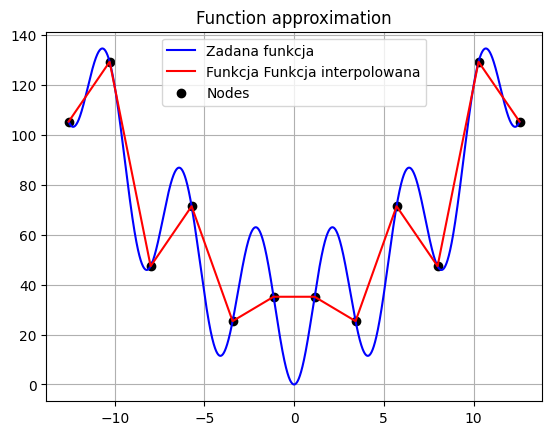

In [47]:
approx(12,55, [1 for _ in range(12)])